## Immanuella Duke
## Final project SCAMP

### Used car dataset: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

-----------------------------------------------------------------------------------

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [ ]:
#Import dataset
vehicles_df = pd.read_csv('vehicles.csv')

## DATA CLEANING

In [3]:
#drop columns that won't be used - id, url, region-url, county

In [ ]:
vehicles_df.description.unique()

In [4]:
vehicles_df = vehicles_df.drop(['id', 'url', 'region_url','county'], axis=1)

In [5]:
pd.set_option('display.max_columns', 500)

In [ ]:
# drop rows with more than 19/22 columns missing.

In [6]:
vehicles_df = vehicles_df[vehicles_df.isnull().sum(axis=1) < 19]

In [7]:
#check for null columns
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426812 entries, 27 to 426879
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426812 non-null  object 
 1   price         426812 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  image_url     426812 non-null  object 
 17  description   426810 non-null  object 
 18  sta

In [8]:
vehicles_df.describe()

,price,year,odometer,lat,long
count,4.268120e+05,425675.000000,4.224800e+05,420331.000000,420331.000000
mean,7.520927e+04,2011.235191,9.804333e+04,38.493940,-94.748599
std,1.218325e+07,9.452120,2.138815e+05,5.841533,18.365462
min,0.000000e+00,1900.000000,0.000000e+00,-84.122245,-159.827728
25%,5.900000e+03,2008.000000,3.770400e+04,34.601900,-111.939847
50%,1.395000e+04,2013.000000,8.554800e+04,39.150100,-88.432600
75%,2.648900e+04,2017.000000,1.335425e+05,42.398900,-80.832039
max,3.736929e+09,2022.000000,1.000000e+07,82.390818,173.885502


#### clean explanatory variables. check for outliers.

In [14]:
vehicles_df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-04T12:31:18-0500
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-04T12:31:08-0500
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-04T12:31:25-0500
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-04T10:41:31-0500
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.592000,-85.518900,2021-05-03T14:02:03-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [ ]:
# region is fine

In [22]:
vehicles_df[vehicles_df.region == 'birmingham']

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
169,birmingham,21950,2012.0,toyota,tacoma 4x4,excellent,4 cylinders,gas,143060.0,clean,manual,NaN,4wd,NaN,truck,silver,https://images.craigslist.org/01414_7wr1JpVcI3...,Morris Auto Sales 205-408-0120 4513 Valleydale...,al,33.384664,-86.737847,2021-05-04T14:11:28-0500
170,birmingham,13950,2011.0,toyota,tacoma,good,4 cylinders,gas,151060.0,clean,automatic,NaN,rwd,NaN,truck,silver,https://images.craigslist.org/00h0h_dZJTo0CfFq...,Morris Auto Sales 205-408-0120 4513 Valleydale...,al,33.384664,-86.737847,2021-05-04T14:06:06-0500
171,birmingham,5900,2001.0,NaN,F-350,NaN,8 cylinders,diesel,200000.0,clean,automatic,NaN,rwd,NaN,NaN,NaN,https://images.craigslist.org/00Z0Z_2WUpYi5KFH...,"The infamous , invincible million Mille 7.3 po...",al,33.266300,-86.902000,2021-05-04T14:04:39-0500
172,birmingham,12950,2005.0,bmw,z4,excellent,6 cylinders,gas,69586.0,clean,automatic,NaN,rwd,NaN,convertible,white,https://images.craigslist.org/00202_gltrHY9BL3...,Morris Auto Sales 205-408-0120 4513 Valleydale...,al,33.384664,-86.737847,2021-05-04T14:01:54-0500
173,birmingham,18950,2010.0,ford,f150 lariat supercrew 4x4,good,8 cylinders,gas,151403.0,clean,automatic,NaN,4wd,NaN,pickup,black,https://images.craigslist.org/00101_f52BrXlkJ5...,Morris Auto Sales 205-408-0120 4513 Valleydale...,al,33.384664,-86.737847,2021-05-04T14:01:05-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,birmingham,33988,2019.0,nissan,frontier,NaN,NaN,gas,11939.0,clean,automatic,1N6AD0EV7KN878847,4wd,NaN,NaN,red,https://images.craigslist.org/00E0E_25pohw4D8S...,phone: ☎ (205) 862-8003 text: Text ...,al,32.922900,-86.545000,2021-04-04T08:54:34-0500
1812,birmingham,20977,2017.0,subaru,outback,NaN,NaN,gas,103664.0,clean,automatic,4S4BSENC5H3286565,NaN,NaN,NaN,blue,https://images.craigslist.org/00y0y_3XUjSTQO6z...,Contemporary Automotive address: 3427 Skyla...,al,33.168322,-87.491902,2021-04-04T08:48:26-0500
1813,birmingham,12977,2010.0,ford,f-150,NaN,NaN,gas,200224.0,clean,automatic,1FTFW1CV0AKE30803,NaN,NaN,NaN,NaN,https://images.craigslist.org/00909_bqNj84HIlc...,Contemporary Automotive address: 3427 Skyla...,al,33.168322,-87.491902,2021-04-04T08:48:25-0500
1814,birmingham,30990,2017.0,alfa-romeo,romeo giulia sedan 4d,good,NaN,gas,19835.0,clean,other,ZARFAEBN6H7548414,rwd,NaN,sedan,NaN,https://images.craigslist.org/00505_gfwnofXeyv...,Carvana is the safer way to buy a car During t...,al,33.520000,-86.790000,2021-04-04T08:13:09-0500


In [ ]:
#if price is below 

In [21]:
vehicles_df[vehicles_df.year.isnull()]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
194,birmingham,33990,NaN,NaN,lac XT5 Crossover,NaN,6 cylinders,gas,48784.0,clean,automatic,1GYKNERSXJZ160440,fwd,NaN,SUV,black,https://images.craigslist.org/00y0y_hPSlZLpavL...,2018 *Cadillac* *XT5 Crossover* FWD 4dr Premiu...,al,33.669601,-86.817617,2021-05-04T10:11:04-0500
350,birmingham,35495,NaN,NaN,Series,NaN,4 cylinders,gas,14000.0,clean,automatic,3MW5R1J08L8B21625,rwd,NaN,sedan,white,https://images.craigslist.org/01212_85QVVsEWjT...,"2020 *BMW* *3 Series* 330i Sedan - $35,495Call...",al,33.669601,-86.817617,2021-05-01T04:40:22-0500
578,birmingham,32995,NaN,NaN,r XF,NaN,4 cylinders,gas,22105.0,clean,automatic,SAJBD4FX6JCY57725,rwd,NaN,sedan,white,https://images.craigslist.org/00R0R_1BbWzlb6TS...,2018 *Jaguar* *XF* 25t Premium RWD Sedan - $32...,al,33.669601,-86.817617,2021-04-27T10:10:59-0500
678,birmingham,29890,NaN,NaN,ai Santa Fe,NaN,6 cylinders,gas,30934.0,clean,automatic,KM8SR4HF6JU283377,fwd,NaN,SUV,white,https://images.craigslist.org/01010_6P3iwHhk3C...,2018 *Hyundai* *Santa Fe* SE Ultimate 3.3L Aut...,al,33.669601,-86.817617,2021-04-25T04:40:35-0500
710,birmingham,26495,NaN,NaN,des-Benz CLA,NaN,4 cylinders,gas,42455.0,clean,automatic,WDDSJ4GB1JN582155,NaN,NaN,sedan,white,https://images.craigslist.org/00R0R_UTqrxBIPTQ...,2018 *Mercedes-Benz* *CLA* CLA 250 4MATIC Coup...,al,33.669601,-86.817617,2021-04-24T10:01:21-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414161,charleston,59697,NaN,NaN,olet Silverado 3500HD CC,NaN,8 cylinders,gas,0.0,clean,automatic,1GB3YSE73LF302749,4wd,NaN,pickup,white,https://images.craigslist.org/00m0m_g4Suf6g4w1...,2020 *Chevrolet* *Silverado 3500HD CC* 3500HD ...,wv,38.767754,-77.707905,2021-04-12T10:06:31-0400
414162,charleston,90877,NaN,NaN,olet Silverado MD,NaN,8 cylinders,diesel,0.0,clean,automatic,1HTKJPVK8LH603974,4wd,NaN,pickup,white,https://images.craigslist.org/00j0j_mdU2vTIrsG...,2020 *Chevrolet* *Silverado MD* 5500HD CREW 4X...,wv,38.767754,-77.707905,2021-04-12T10:05:21-0400
423519,milwaukee,16990,NaN,NaN,HR-V,NaN,4 cylinders,gas,60424.0,NaN,manual,3CZRU5G34JM700914,fwd,NaN,SUV,NaN,https://images.craigslist.org/00Y0Y_dj1xAat4S2...,2018 *Honda* *HR-V* LX 6 SPEED MANUAL SUV - $...,wi,43.176636,-88.023648,2021-04-26T11:42:40-0500
423528,milwaukee,19995,NaN,NaN,Renegade,NaN,4 cylinders,gas,9217.0,NaN,automatic,ZACNJBBB2KPK07433,4wd,NaN,SUV,NaN,https://images.craigslist.org/00V0V_9TKWxbnlp3...,2019 *Jeep* *Renegade* LATITUDE 4WD ONE OWNER ...,wi,43.176636,-88.023648,2021-04-26T11:38:41-0500


<AxesSubplot:xlabel='price'>

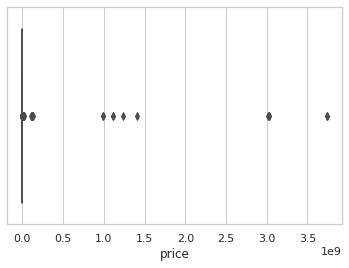

In [9]:
#price
sns.set_theme(style="whitegrid")
sns.boxplot(x=vehicles_df.price)

<AxesSubplot:xlabel='odometer'>

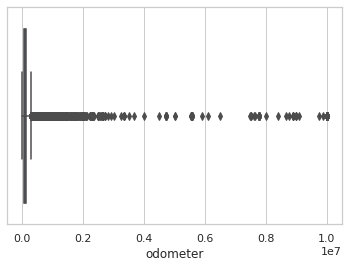

In [10]:
sns.boxplot(x=vehicles_df.odometer)

<AxesSubplot:xlabel='year'>

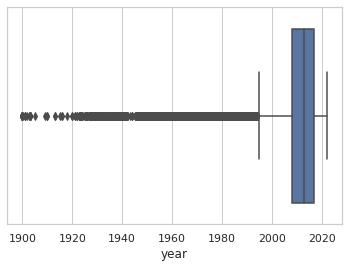

In [11]:
sns.boxplot(x=vehicles_df.year)
#Majority of the years are within 2000-2020

In [12]:
#check rows where price is 0
vehicles_df[vehicles_df['price'] == 123456789]

##assuming that a car with price 0 hasn't been priced yet.

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
137807,spokane / coeur d'alene,123456789,1999.0,buick,regal,like new,6 cylinders,gas,96000.0,clean,automatic,NaN,fwd,full-size,sedan,white,https://images.craigslist.org/00A0A_hk9qOBaNnN...,This supercharged regal is no longer charged s...,id,47.695200,-117.365800,2021-04-29T08:48:15-0700
193736,ann arbor,123456789,2015.0,chevrolet,cruze,like new,NaN,gas,64181.0,clean,automatic,1G1PC5SB0F7246637,fwd,compact,sedan,red,https://images.craigslist.org/00E0E_4p2RpUAHok...,PLEASE CALL FOR PRICING ON THE LOT AND FOR S...,mi,41.381500,-83.650700,2021-05-01T17:44:14-0400
207080,muskegon,123456789,2003.0,NaN,Chevy/gmc,good,8 cylinders,diesel,1234567.0,clean,automatic,NaN,fwd,NaN,pickup,NaN,https://images.craigslist.org/00d0d_kHs4Hq08Ue...,"Motors, transmissions, body parts or buy them ...",mi,43.876377,-86.400267,2021-05-04T13:57:30-0400
288356,akron / canton,123456789,1965.0,chevrolet,project,NaN,NaN,gas,100000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00Q0Q_i7qdTN6X31...,"1965 Chevy Nova $10,000 FIRM. New floors, new ...",oh,41.019700,-81.621200,2021-04-05T19:34:36-0400
307488,stillwater,123456789,1996.0,gmc,sierra 2500,fair,8 cylinders,gas,320000.0,clean,automatic,NaN,4wd,full-size,pickup,black,https://images.craigslist.org/00c0c_4Ro2ut1gbk...,"$99,666 Not Really! It’s the worse truck...",ok,36.703100,-97.078400,2021-04-07T12:44:56-0500
358555,nashville,123456789,2021.0,NaN,Rare Car,good,8 cylinders,gas,0.0,clean,other,NaN,rwd,NaN,NaN,NaN,https://images.craigslist.org/00808_ljj7g2FCAw...,A fair amount of nice senior-owned cars here f...,tn,35.887481,-86.958798,2021-05-04T20:08:56-0500


In [13]:
vehicles_df[vehicles_df['price'] == 1]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
466,birmingham,1,2012.0,ford,f250 super duty,NaN,NaN,gas,150000.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,https://images.craigslist.org/01212_84B2ENVIv8...,SOUTHERN TRUCKS!! Huge Selection of Work and U...,al,35.250700,-87.352600,2021-04-28T15:16:22-0500
975,birmingham,1,2002.0,nissan,maxima,NaN,NaN,gas,196000.0,clean,automatic,NaN,NaN,NaN,NaN,black,https://images.craigslist.org/00c0c_4qlEaOnigc...,"$3,300 Selling a 2002 Nissan Maxima with 3.6L ...",al,33.649300,-86.705700,2021-04-20T19:09:54-0500
1009,birmingham,1,2003.0,cadillac,escalade esv,NaN,NaN,gas,315836.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00s0s_cpR1l4kepz...,"2003 Cadillac Escalade ESV: AWD, Vortec 6.0 L ...",al,33.923249,-87.627811,2021-04-19T23:48:32-0500
1555,birmingham,1,1999.0,NaN,"1999 ply,prowler",good,8 cylinders,gas,1000.0,salvage,automatic,NaN,rwd,compact,convertible,black,https://images.craigslist.org/00C0C_g6MJ4OWuYp...,"Custom,prowler.ls1,4l60.9”Ford 350 gears with ...",al,33.739200,-86.772600,2021-04-08T18:37:11-0500
1754,birmingham,1,2005.0,gmc,envoy,excellent,8 cylinders,gas,181000.0,clean,automatic,NaN,4wd,full-size,SUV,white,https://images.craigslist.org/00l0l_b2LEfHa5ey...,"Clean 2005 GMC Envoy $5,500 show contact info",al,33.505374,-86.852645,2021-04-05T11:16:20-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423876,milwaukee,1,2008.0,buick,lacrosse premium,good,6 cylinders,gas,9000.0,clean,automatic,NaN,fwd,mid-size,sedan,silver,https://images.craigslist.org/01717_ef1rHmZXst...,We buy junk cars and trucks we pay best price ...,wi,42.716100,-87.823300,2021-04-23T13:33:04-0500
424893,milwaukee,1,1970.0,chevrolet,nova ss,NaN,8 cylinders,gas,2560.0,clean,manual,NaN,rwd,full-size,coupe,green,https://images.craigslist.org/00a0a_3w9D0Gzlfn...,1970 Nova GM 502 block V8 3140 Crank Blueprint...,wi,43.303400,-88.002900,2021-04-15T18:54:25-0500
425626,wausau,1,2012.0,chevrolet,express,excellent,8 cylinders,gas,123.0,clean,automatic,NaN,4wd,full-size,van,NaN,https://images.craigslist.org/00606_i5i7o7Vpn7...,Now Available Online and on our lot at Goodguy...,wi,45.549700,-94.224500,2021-05-03T09:25:20-0500
425627,wausau,1,2012.0,chevrolet,express,excellent,8 cylinders,gas,1.0,clean,automatic,NaN,NaN,full-size,van,white,https://images.craigslist.org/01515_apCGygIDe1...,Now Available Online and on our lot at Goodguy...,wi,45.549700,-94.224500,2021-05-03T09:06:18-0500


In [ ]:
sns.heatmap(vehicles_df)

check for spelling mistakes in categorical variables

In [ ]:
#sorted(vehicles_df.region.unique()) #categorical region seems fine
#vehicles_df.manufacturer.unique() #manufacturer seems fine
pd.set_option('display.max_row', 1000)
vehicles_df.model.unique()